# Create model with BoomBikes Dataset

## Problem Statement

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits

## Aim

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### Import the necessary Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

#### Load the dataset

In [5]:
df = pd.read_csv(r"C:\\Users\0528C7744\Desktop\Preparation\upgrad\CASE_STUDY\Casestudy2\day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Shape of original dataset

In [7]:
df.shape

(730, 16)

#### Drop casual, registered columns

In [8]:
# drop casual, registered
df=df.drop(columns=['casual', 'registered'])
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Remove dteday and extract day from that

In [9]:
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')
df['day'] = df['dteday'].dt.day
df.drop(columns=['dteday'], inplace=True)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


#### Check for null values

In [10]:
df.isnull().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
day           0
dtype: int64

#### Convert 'season' , 'weathersit' and 'yr' to categorical string values

In [11]:
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df['weathersit'] = df['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})
df['yr'] = df['yr'].map({0: '2018', 1: '2019'})
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,spring,2018,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1
1,2,spring,2018,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,2
2,3,spring,2018,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,3
3,4,spring,2018,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,4
4,5,spring,2018,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,5


In [12]:
df.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day'],
      dtype='object')

#### Separate the categorical and numerical columns

In [13]:
cat_cols=['season','weathersit','weekday','mnth','workingday','yr','holiday'] 
num_cols=['temp', 'atemp', 'hum', 'windspeed','day']

## EDA on Dataset

### Univariate Analysis

#### Univariate Analysis for numerical columns

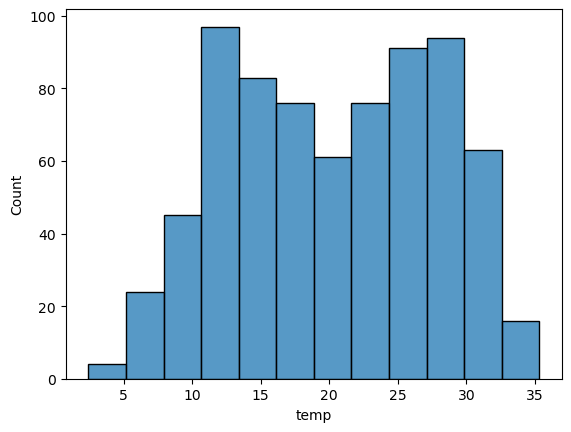

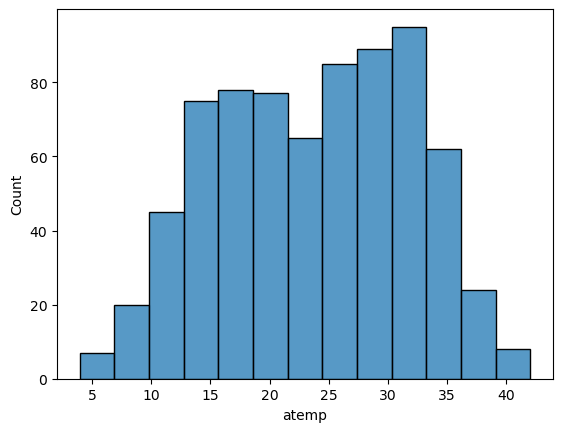

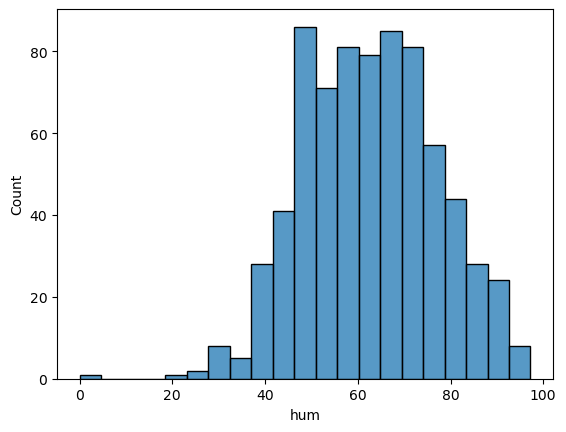

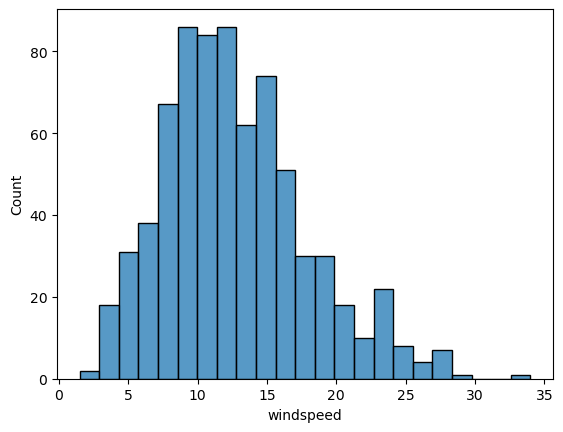

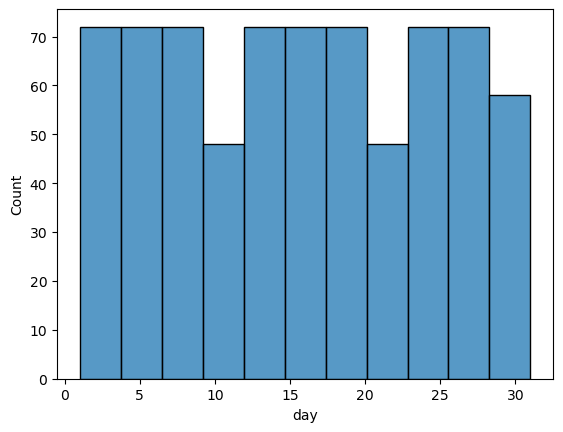

In [14]:
for i in num_cols:
    sns.histplot(x=df[i])
    plt.show()

#### Univariate Analysis for categorical columns

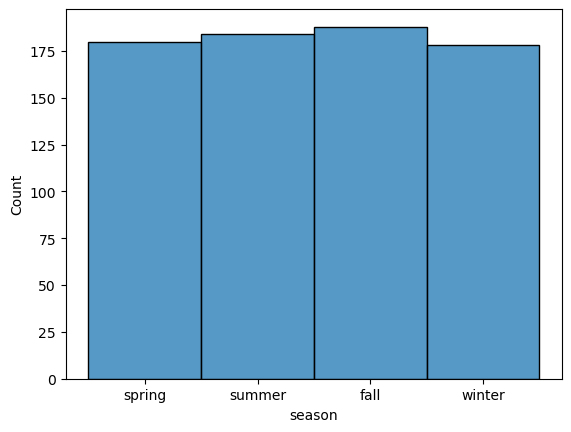

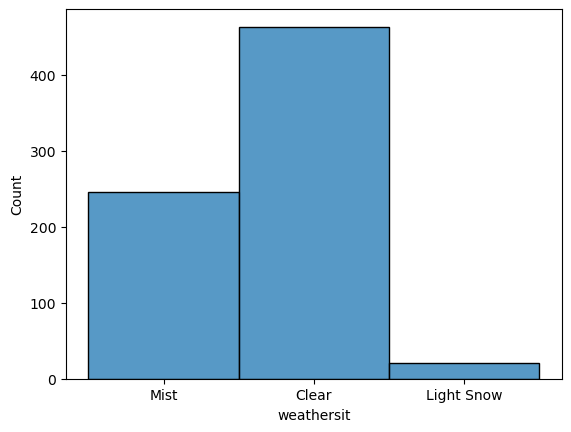

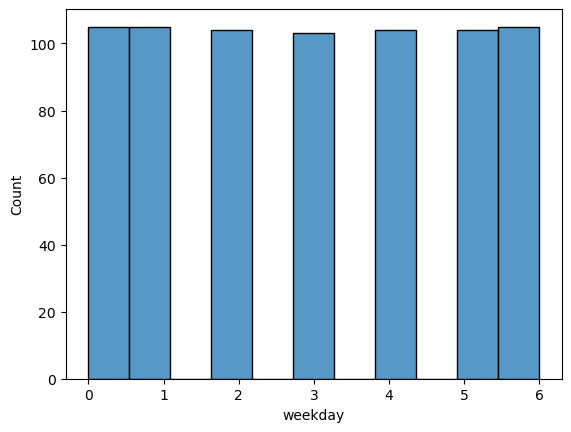

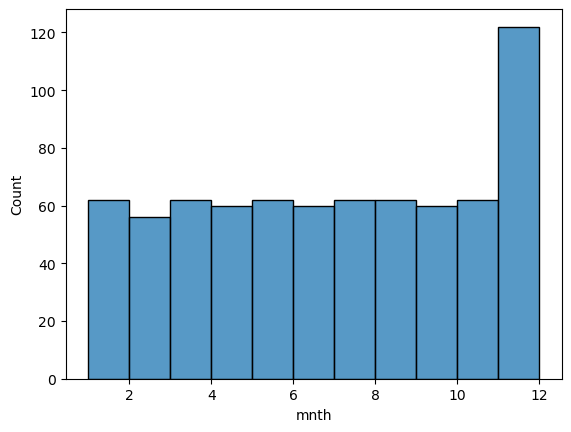

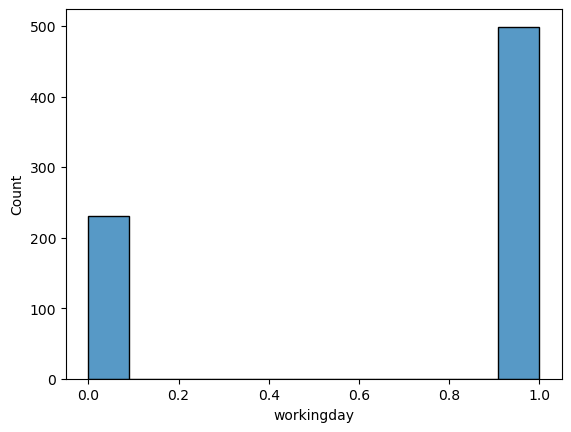

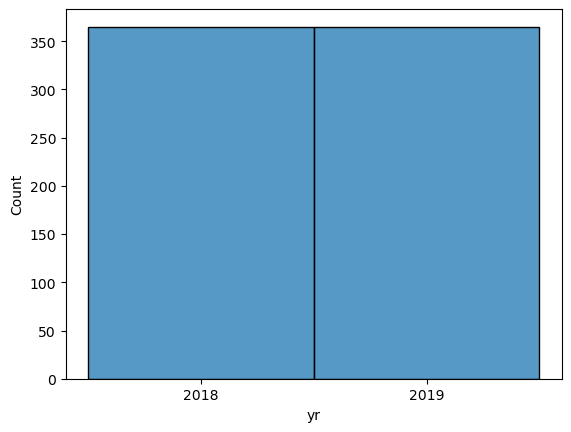

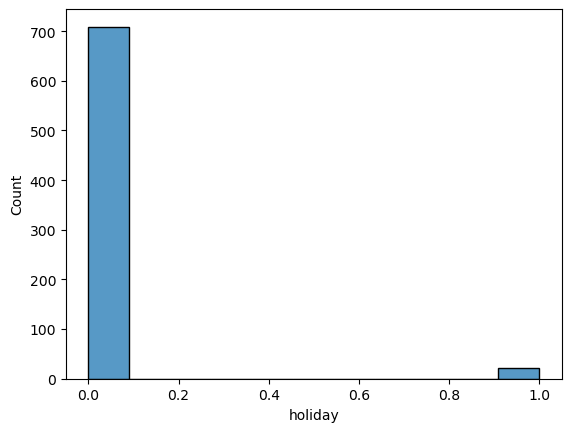

In [13]:
for i in cat_cols:
    sns.histplot(x=df[i])
    plt.show()


### Bivariate Analysis

#### Bivariate Analysis for numerical colums

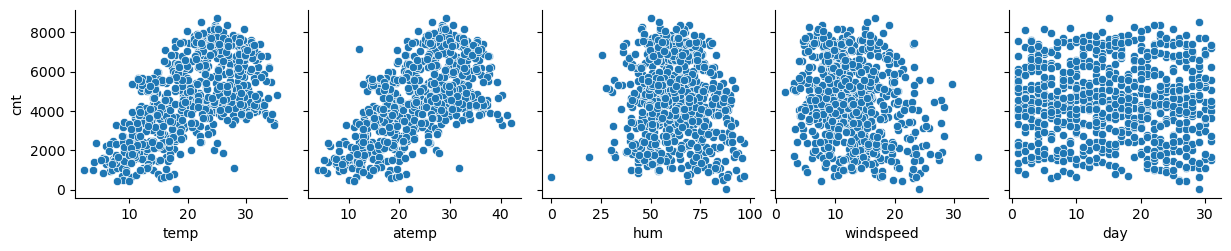

In [15]:
sns.pairplot(df, x_vars=num_cols, y_vars='cnt', kind='scatter')
plt.show()

#### Bivariate Analysis for categorical columns

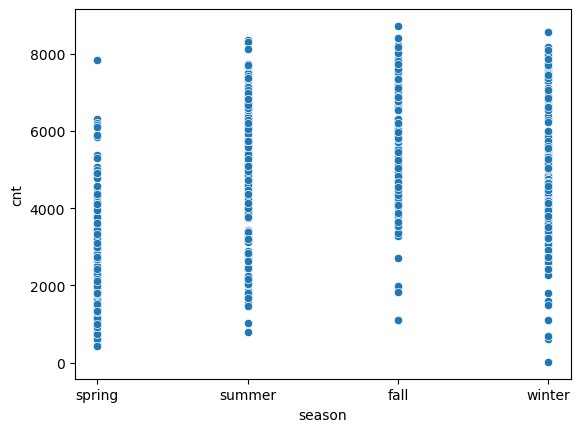

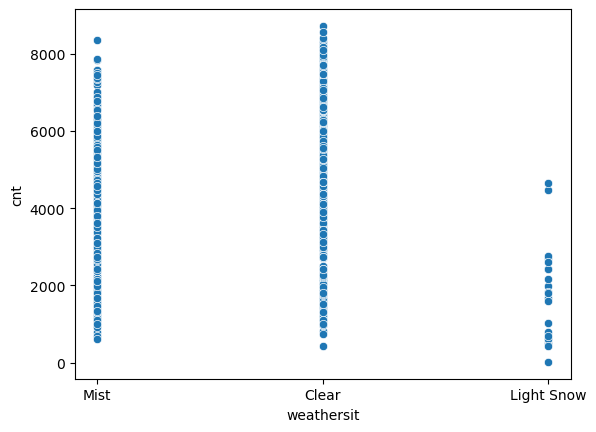

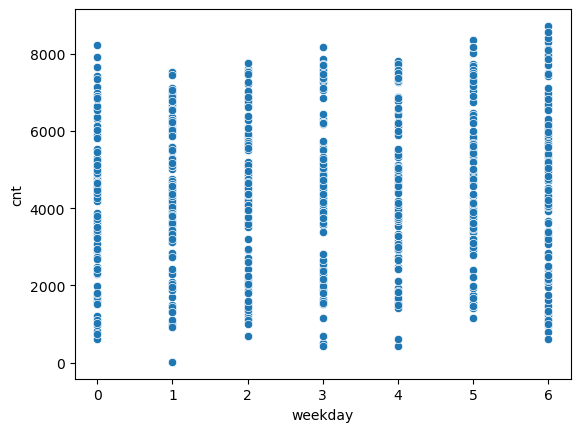

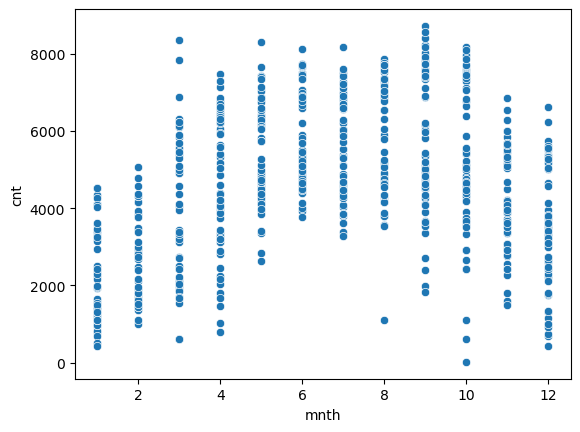

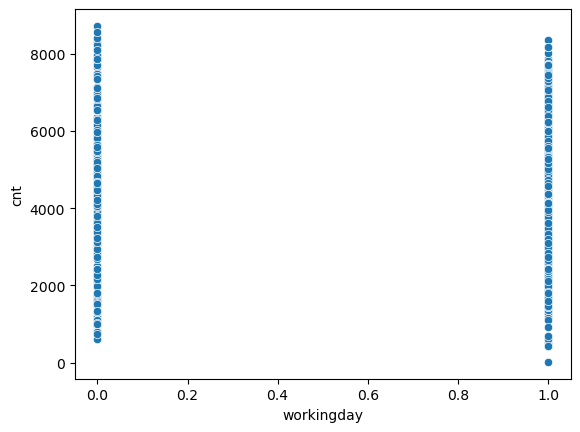

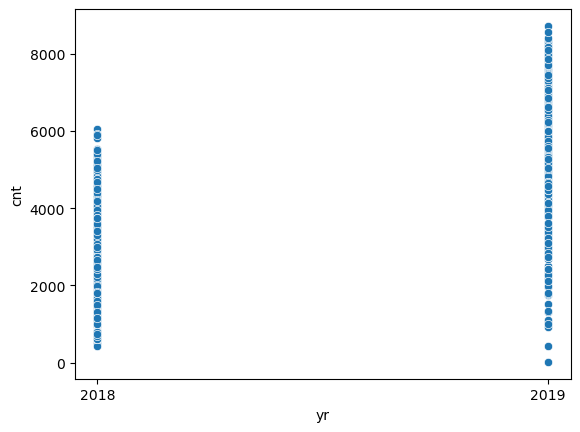

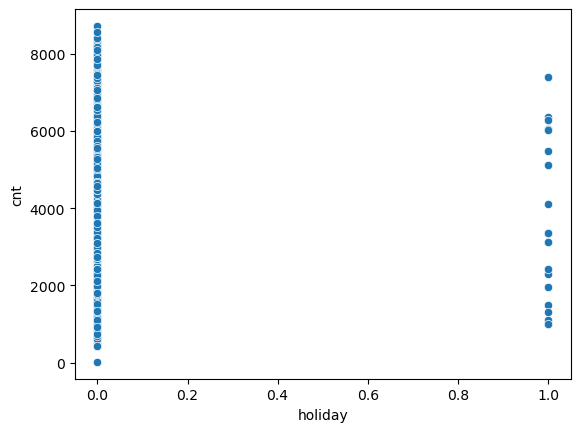

In [16]:
for i in cat_cols:
    sns.scatterplot(x=df[i],y=df["cnt"])
    plt.show()

### Multivairate Analysis

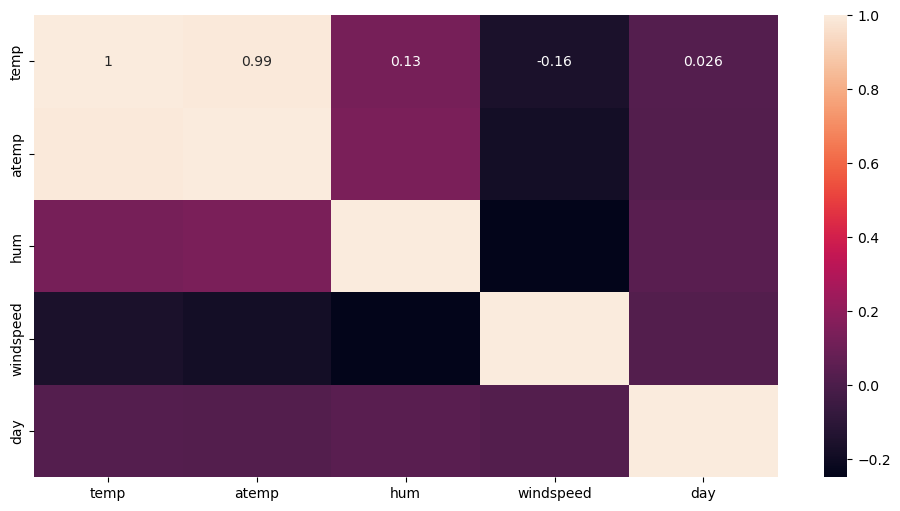

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(df[num_cols].corr(),annot=True)
plt.show()

#### Check the number of categories for categorical variables

In [18]:
df[cat_cols].nunique()

season         4
weathersit     3
weekday        7
mnth          12
workingday     2
yr             2
holiday        2
dtype: int64

#### Create dummy variables for all the categorical variables whose category is >2

In [19]:
df_with_dummies = pd.get_dummies(df, columns=['season', 'weathersit', 'weekday', 'mnth'], drop_first=True)
df_with_dummies.shape

(730, 32)

In [20]:
df_with_dummies.columns

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'day', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_Light Snow', 'weathersit_Mist',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12'],
      dtype='object')

In [21]:
df_with_dummies.columns=df_with_dummies.columns.astype(str)

#### Split the data into training and test sets

In [22]:
X=df_with_dummies.drop(["cnt"],axis=1)
y =df_with_dummies['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(584, 31)
(146, 31)


### Scaling


#### Initialize and fit scaler

In [27]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

### Feature Selection

#### RFE

In [28]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=7)
selector=selector.fit(X_train,y_train)
selector.support_

array([False,  True, False, False, False,  True, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True])

In [29]:
selected_features=X_train.columns[selector.support_]
print(selected_features)

Index(['yr', 'atemp', 'season_spring', 'season_winter',
       'weathersit_Light Snow', 'mnth_11', 'mnth_12'],
      dtype='object')


#### Selected Features : 
       'yr', 'atemp', 'season_spring', 'season_winter',
       'weathersit_Light Snow', 'mnth_11', 'mnth_12' . Keep only selected features in training and testing data.

In [30]:
X_train_selected=X_train[selected_features]
X_test_selected=X_test[selected_features]

### Build a regression model

In [31]:
X_train_sm=sm.add_constant(X_train_selected)
X_test_xm=sm.add_constant(X_test_selected)

In [32]:
# Convert 'yr' to numeric
X_train_sm['yr'] = pd.to_numeric(X_train_sm['yr'], errors='coerce')

# Convert boolean columns to integers
bool_cols = X_train_sm.select_dtypes(include=['bool']).columns
X_train_sm[bool_cols] = X_train_sm[bool_cols].astype(int)


### R-squared for below model: 0.787

### Adj. R-squared : 0.785

### Selected Features :['yr', 'atemp', 'season_spring', 'season_winter',   'weathersit_Light Snow', 'mnth_11', 'mnth_12']

In [33]:
model=sm.OLS(np.array(y_train),X_train_sm)
res1=model.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     304.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          7.82e-189
Time:                        13:14:59   Log-Likelihood:                -4802.1
No. Observations:                 584   AIC:                             9620.
Df Residuals:                     576   BIC:                             9655.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.064e+06   1.53e+05    -26.618      0.000   -4.36e+06   -3.76e+06
yr                     2015.9260     75.648     26.649      0.000    1867.347    2164.505
atemp                   812.0443     61.922     13.114      0.000     690.424     933.665
season_spring         -1209.1254    147.304     -8.208      0.000   -1498.443    -919.808
season_winter           733.6481    124.209      5.907      0.000     489.690     977.607
weathersit_Light Snow -2260.8550    214.201    -10.555      0.000   -2681.566   -1840.144
mnth_11                -675.7477    168.375     -4.013      0.000   -1006.451    -345.044
mnth_12                -676.2651    159.719     -4.234      0.000    -989.969    -362.561
==============================================================================
Omnibus:                       93.402   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.913
Skew:                          -0.861   Prob(JB):                     2.62e-46
Kurtosis:                       5.380   Cond. No.                     8.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### VIF calcuation

In [34]:
# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i)
    for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.653101e+07
1,yr,1.013781e+00
2,atemp,2.718620e+00
3,season_spring,2.720058e+00
4,season_winter,2.078826e+00
5,weathersit_Light Snow,1.023954e+00
6,mnth_11,1.630435e+00
7,mnth_12,1.260073e+00


### Feature Selection ( Hybrid )

#### Selected Features : 'yr','workingday','atemp', 'windspeed','day', 'season_spring', 'weathersit_Light Snow', 'weathersit_Mist',     
####       'weekday_6', 'mnth_3','mnth_6', 'mnth_7',  'mnth_8', 'mnth_10'

#### New R-squared: 0.828
#### Adj. R-squared:	0.824

In [35]:
selected_cols_new=['yr','workingday','atemp',
       'windspeed','day', 'season_spring',
       'weathersit_Light Snow', 'weathersit_Mist',      
       'weekday_6', 'mnth_3','mnth_6', 'mnth_7',
       'mnth_8', 'mnth_10']
X_train_selectedNew=X_train[selected_cols_new]
X_test_selectedNew=X_test[selected_cols_new]

X_train_smNew=sm.add_constant(X_train_selectedNew)
X_test_smNew=sm.add_constant(X_test_selectedNew)

# Convert 'yr' to numeric
X_train_smNew['yr'] = pd.to_numeric(X_train_smNew['yr'], errors='coerce')
X_test_smNew['yr'] = pd.to_numeric(X_test_smNew['yr'], errors='coerce')

# Convert boolean columns to integers
bool_cols = X_train_smNew.select_dtypes(include=['bool']).columns
X_train_smNew[bool_cols] = X_train_smNew[bool_cols].astype(int)
X_test_smNew[bool_cols] = X_test_smNew[bool_cols].astype(int)

model1 = sm.OLS(y_train, X_train_smNew)

#model1=sm.OLS(np.array(y_train),X_train_smNew)
res1=model1.fit()
res1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     195.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          9.30e-207
Time:                        13:15:29   Log-Likelihood:                -4739.9
No. Observations:                 584   AIC:                             9510.
Df Residuals:                     569   BIC:                             9575.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -4.05e+06   1.38e+05    -29.340      0.000   -4.32e+06   -3.78e+06
yr                     2008.7115     68.381     29.375      0.000    1874.402    2143.021
workingday              407.3755     90.650      4.494      0.000     229.326     585.424
atemp                   891.8331     59.441     15.004      0.000     775.082    1008.585
windspeed              -173.0834     35.006     -4.944      0.000    -241.840    -104.327
day                     -73.2833     34.068     -2.151      0.032    -140.197      -6.369
season_spring         -1331.2063    111.802    -11.907      0.000   -1550.802   -1111.611
weathersit_Light Snow -2469.5715    198.709    -12.428      0.000   -2859.863   -2079.280
weathersit_Mist        -667.2246     73.081     -9.130      0.000    -810.766    -523.683
weekday_6               502.9858    120.075      4.189      0.000     267.141     738.831
mnth_3                  409.2338    143.751      2.847      0.005     126.886     691.582
mnth_6                 -200.0221    142.420     -1.404      0.161    -479.756      79.711
mnth_7                 -714.1635    150.398     -4.749      0.000   -1009.566    -418.761
mnth_8                 -414.6971    150.123     -2.762      0.006    -709.560    -119.835
mnth_10                 524.3193    122.762      4.271      0.000     283.198     765.441
==============================================================================
Omnibus:                       80.287   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.818
Skew:                          -0.749   Prob(JB):                     5.44e-40
Kurtosis:                       5.278   Cond. No.                     8.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### VIF calculation for new Model

In [36]:
# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_smNew.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_smNew.values,i)
    for i in range(len(X_train_smNew.columns))]
vif_data

,Feature,VIF
0,const,1.651057e+07
1,yr,1.012486e+00
2,workingday,1.567337e+00
3,atemp,3.062016e+00
4,windspeed,1.061969e+00
5,day,1.005808e+00
6,season_spring,1.915238e+00
7,weathersit_Light Snow,1.077057e+00
8,weathersit_Mist,1.044739e+00
9,weekday_6,1.538724e+00


In [37]:
print("Shape of X_train_smNew:", X_train_smNew.shape)
print("Shape of X_test_smNew:", X_test_smNew.shape)

# Check the number of parameters in the model
print("Number of parameters in the model:", len(res1.params))

Shape of X_train_smNew: (584, 15)
Shape of X_test_smNew: (146, 15)
Number of parameters in the model: 15


### Make predictions on the test set

#### R-squared score on the test set: 0.8388419463738221
#### Adjusted R^2 for test data: 0.821618948276368

In [38]:
y_pred = res1.predict(X_test_smNew)

In [39]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared score on the test set: {r2}')

n = X_test_smNew.shape[0]

# Number of predictors (excluding the constant term)
k = X_test_smNew.shape[1] - 1  # Subtract 1 for the constant term

# Compute Adjusted R^2
adj_r2_test = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("Adjusted R^2 for test data:", adj_r2_test)

R-squared score on the test set: 0.8388419463738221
Adjusted R^2 for test data: 0.821618948276368


#### Final Model Selected is res1 with R-squared:	0.828 and Adj. R-squared:	0.824

#### Plot the residuals (errors) against the fitted values (predicted values), to check the violation of linearity assumption 

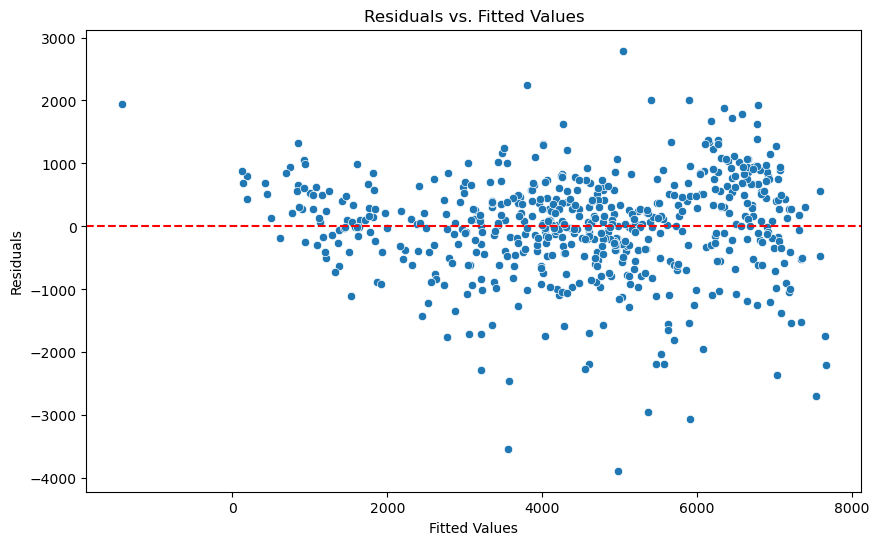

In [40]:
fitted_values = res1.predict(X_train_smNew)
residuals = y_train - fitted_values

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

### Q-Q Plot of Residuals

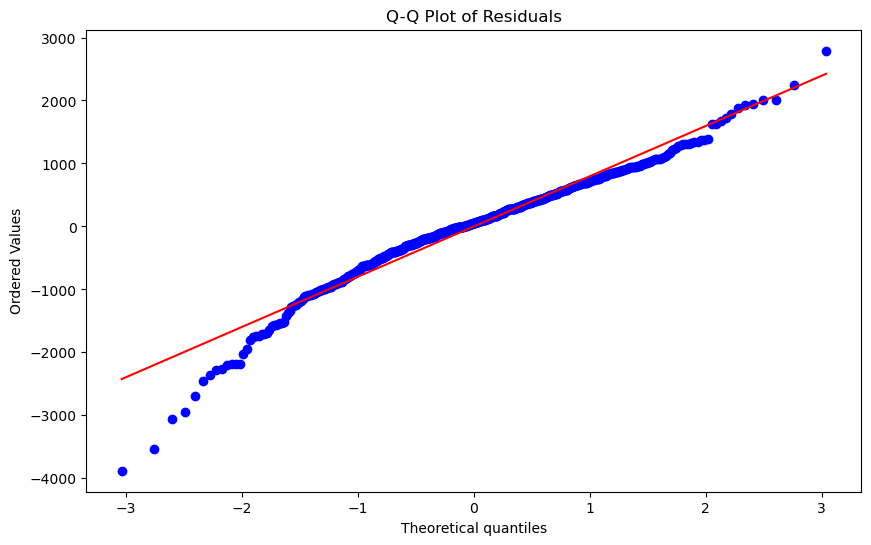

In [42]:
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()